In [34]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

In [36]:
data = pd.read_csv(r'pysicalinfo.csv', encoding='euc-kr',low_memory=False)
data = data[['가슴 둘레 센티미터', '소매길이 센티미터', '신장 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터', '몸무게 킬로그램']]
data.head()

,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167980 entries, 0 to 167979
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   가슴 둘레 센티미터  167980 non-null  float64
 1   소매길이 센티미터   167980 non-null  float64
 2   신장 센티미터     167980 non-null  float64
 3   허리 둘레 센티미터  167980 non-null  object 
 4   샅높이 센티미터    167980 non-null  float64
 5   머리 둘레 센티미터  167980 non-null  float64
 6   발 길이 센티미터   167980 non-null  float64
 7   몸무게 킬로그램    167980 non-null  float64
dtypes: float64(7), object(1)
memory usage: 10.3+ MB


In [40]:
data = data.apply(pd.to_numeric, errors='coerce')
data.head()

,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167980 entries, 0 to 167979
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   가슴 둘레 센티미터  167980 non-null  float64
 1   소매길이 센티미터   167980 non-null  float64
 2   신장 센티미터     167980 non-null  float64
 3   허리 둘레 센티미터  135669 non-null  float64
 4   샅높이 센티미터    167980 non-null  float64
 5   머리 둘레 센티미터  167980 non-null  float64
 6   발 길이 센티미터   167980 non-null  float64
 7   몸무게 킬로그램    167980 non-null  float64
dtypes: float64(8)
memory usage: 10.3 MB


In [44]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135669 entries, 0 to 135668
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   가슴 둘레 센티미터  135669 non-null  float64
 1   소매길이 센티미터   135669 non-null  float64
 2   신장 센티미터     135669 non-null  float64
 3   허리 둘레 센티미터  135669 non-null  float64
 4   샅높이 센티미터    135669 non-null  float64
 5   머리 둘레 센티미터  135669 non-null  float64
 6   발 길이 센티미터   135669 non-null  float64
 7   몸무게 킬로그램    135669 non-null  float64
dtypes: float64(8)
memory usage: 9.3 MB


In [46]:
# 데이터 전처리
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.33971292, 0.68888889, 0.71205357, ..., 0.42857143, 0.58088235,
        0.3487882 ],
       [0.42902711, 0.29777778, 0.30357143, ..., 0.25210084, 0.26470588,
        0.26343519],
       [0.3907496 , 0.55555556, 0.58705357, ..., 0.36134454, 0.55147059,
        0.55953635],
       ...,
       [0.68102073, 0.67111111, 0.68303571, ..., 0.78991597, 0.52205882,
        0.73656481],
       [0.26315789, 0.57333333, 0.609375  , ..., 0.79831933, 0.49264706,
        0.35827187],
       [0.42743222, 0.44      , 0.47321429, ..., 0.81512605, 0.46323529,
        0.53213909]])

In [48]:
# 컬럼값 가져오기
feature_names = scaler.get_feature_names_out(input_features=data.columns)
x = scaled_data[:,:-1] # 마지막 컬럼을 제외한 모든 컬럼
x = pd.DataFrame(x, columns=feature_names[:-1])
y = scaled_data[:,-1] # 마지막 컬럼


In [50]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=42)


In [52]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(108535, 7)
(108535,)
(27134, 7)
(27134,)


In [54]:
# 인공신경망 모델 생성 및 학습
model = keras.Sequential([
    keras.layers.Dense(7),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [56]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [58]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
history = model.fit(train_x,train_y, epochs=50,
                    validation_data =(test_x,test_y),
                    callbacks=[early_stop])

Epoch 1/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0040 - mae: 0.0459 - val_loss: 0.0028 - val_mae: 0.0406
Epoch 2/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0026 - mae: 0.0389 - val_loss: 0.0024 - val_mae: 0.0371
Epoch 3/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0025 - mae: 0.0376 - val_loss: 0.0025 - val_mae: 0.0376
Epoch 4/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0024 - mae: 0.0368 - val_loss: 0.0023 - val_mae: 0.0360
Epoch 5/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0024 - mae: 0.0368 - val_loss: 0.0023 - val_mae: 0.0360
Epoch 6/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0023 - mae: 0.0366 - val_loss: 0.0023 - val_mae: 0.0360
Epoch 7/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0023 - mae: 0.0366 - val_loss: 0.0022 - val_mae: 0.0357
Epoch 8/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0023 - mae: 0.0364 - val_loss: 0.0023 - val_mae: 0.0362
Epoch 9/50
3392/3392 ━━━━━━━━━━━━━━━━━━━

In [59]:
# 새로운 데이터 예측
def predict_new_data(new_data):
    """
    새로운 데이터를 입력받아 예측값을 반환합니다.

    Args:
        new_data: 예측에 사용할 새로운 데이터 (numpy array)

    Returns:
        예측값 (numpy array)
    """
    # 입력 데이터 전처리
    new_data_scaled = scaler.transform(new_data)  # MinMaxScaler를 사용하여 전처리
    # 예측 수행
    prediction = model.predict(new_data_scaled[:,:-1])
    # 예측값 반환
    return prediction

def draw_graph(prediction, label, history):
    x = prediction / np.max(prediction, axis=0)
    y = label / np.max(label, axis=0)

    minval = min(np.min(x), np.min(y))
    maxval = max(np.max(x), np.max(y))

    fig = plt.figure(figsize=(8, 8))
    plt.title("Regression Result")
    plt.xlabel("Ground Truth")
    plt.ylabel("AI Predict")
    plt.scatter(x, y)
    plt.plot([minval, maxval], [minval, maxval], "red")
    fig.savefig("result.png")

    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

848/848 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step


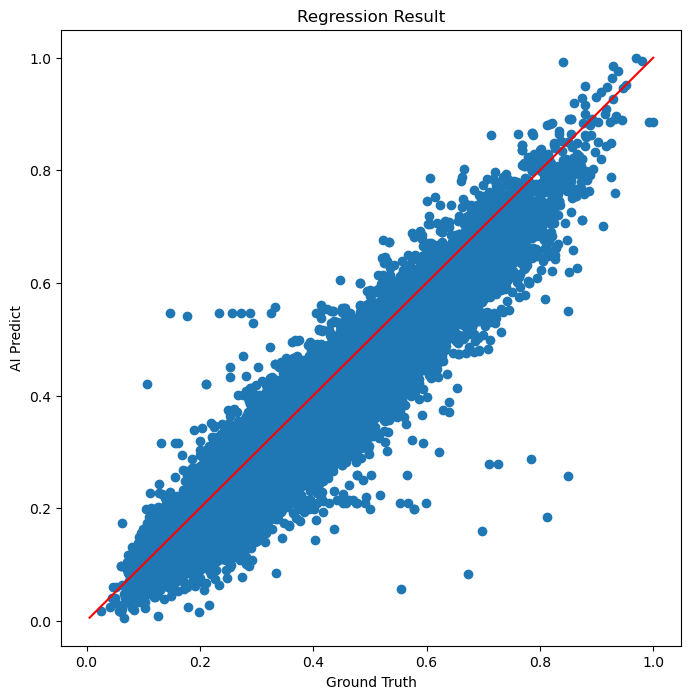

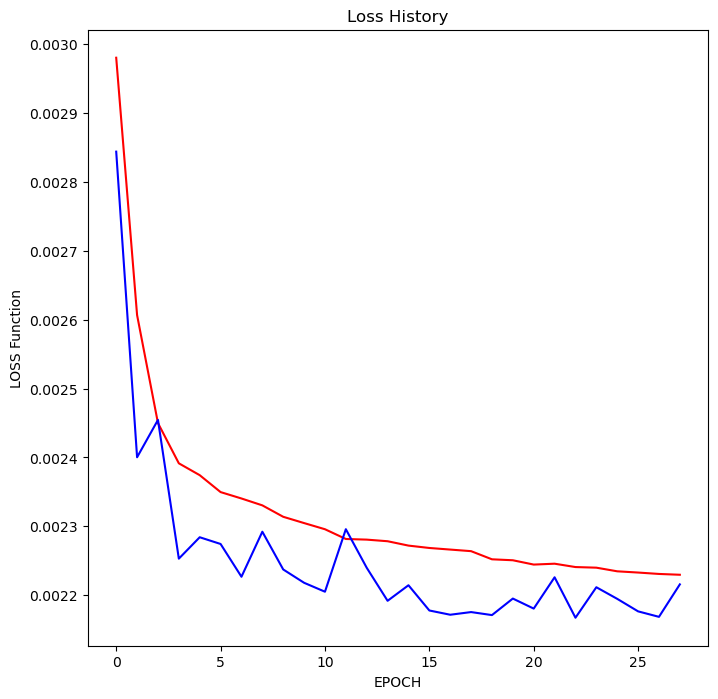

In [60]:
prediction = model.predict(test_x)
draw_graph(prediction, test_y, history)

In [100]:
#예측 예시 (새로운 데이터 샘플)
new_data_sample = np.array([[98, 89.7, 174, 92, 83, 60, 28, 0]])  # 가슴둘레, 팔둘레, 키, 허리둘레, 엉덩이둘레, 머리둘레, 발길이
prediction = predict_new_data(new_data_sample)
predictions = np.array([[0,0,0,0,0,0,0,prediction[0][0]]])
result = scaler.inverse_transform(predictions)
print("예측 결과:", result[0][-1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
예측 결과: 77.55686791241169


C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
